In [17]:

using Pkg

# Instalar paquetes necesarios si no están instalados
for pkg in ["Graphs", "GraphPlot", "DataFrames", "Random", "GLM", "Plots", "StatsBase","Compose","Cairo", "Fontconfig"]
    if !(pkg in keys(Pkg.project().dependencies))
        Pkg.add(pkg)
    end
end



   Resolving package versions...
   Installed Graphics ─ v1.1.3
   Installed Cairo ──── v1.1.1
    Updating `C:\Users\FERNANDO\.julia\environments\v1.11\Project.toml`
  [159f3aea] + Cairo v1.1.1
    Updating `C:\Users\FERNANDO\.julia\environments\v1.11\Manifest.toml`
  [159f3aea] + Cairo v1.1.1
  [a2bd30eb] + Graphics v1.1.3
Precompiling project...
   8175.4 ms  ✓ Graphics
   7679.3 ms  ✓ HypothesisTests
   4291.6 ms  ✓ Cairo
  3 dependencies successfully precompiled in 48 seconds. 396 already precompiled.
   Resolving package versions...
   Installed Fontconfig ─ v0.4.1
    Updating `C:\Users\FERNANDO\.julia\environments\v1.11\Project.toml`
  [186bb1d3] + Fontconfig v0.4.1
    Updating `C:\Users\FERNANDO\.julia\environments\v1.11\Manifest.toml`
  [186bb1d3] + Fontconfig v0.4.1
Precompiling project...
    739.9 ms  ✓ Fontconfig
  1 dependency successfully precompiled in 6 seconds. 399 already precompiled.


In [18]:
using Graphs
using GraphPlot
using DataFrames
using Random
using GLM
using Plots
using StatsBase
using Compose
import Cairo, Fontconfig

couldn't load font "Helvetica Not-Rotated 15.12px", falling back to "Sans Not-Rotated 15.12px", expect ugly output.couldn't load font "Helvetica 15.12px", falling back to "Sans 15.12px", expect ugly output.

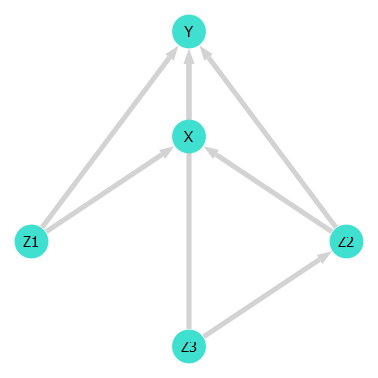

In [ ]:

# Definimos los nodos
nodos = ["Z1", "Z2", "Z3", "X", "Y"]
G = SimpleDiGraph(length(nodos))

# Mapeo de nombres a índices
idx = Dict(name => i for (i, name) in enumerate(nodos))

# Añadimos las aristas
aristas = [
    ("Z1", "X"),
    ("Z1", "Y"),
    ("Z2", "X"),
    ("Z2", "Y"),
    ("Z3", "Z2"),
    ("Z3", "Y"),
    ("X", "Y")
]
for (a, b) in aristas
    add_edge!(G, idx[a], idx[b])
end

# Posiciones (como en tu código Python)
pos = Dict(
    "Z1" => (-1.0, 1.0),
    "Z2" => (1.0, 1.0),
    "Z3" => (0.0, 2.0),
    "X"  => (0.0, 0.0),
    "Y"  => (0.0, -1.0)
)
x = [pos[n][1] for n in nodos]
y = [pos[n][2] for n in nodos]

# Grafo como objeto Compose
p = gplot(G, x, y;
          nodelabel = nodos,
          arrowlengthfrac = 0.1,
          nodesize = 0.15)

# Guardar en archivo PNG
draw(PNG("grafo_dirigido.png", 600px, 500px), p)

# Si usas un notebook, mostrar directamente
display(p)



# GENERACION DE DATOS
--

In [20]:
using Random, DataFrames

# Semilla para reproducibilidad
Random.seed!(123)

# Número de observaciones
n = 1_000_000

# Simulación del DAG
Z1 = randn(n)                # Distribución normal estándar
Z3 = randn(n)
Z2 = Z3 .+ randn(n)
X  = Z1 .+ Z2 .+ randn(n)
Y  = 1 .* X .+ Z1 .+ Z2 .+ Z3 .+ randn(n)

# Crear un DataFrame con los datos
datos = DataFrame(Z1 = Z1, Z2 = Z2, Z3 = Z3, X = X, Y = Y)

# Mostrar las primeras filas
first(datos, 5)


Row,Z1,Z2,Z3,X,Y
,Float64,Float64,Float64,Float64,Float64
1,0.808288,0.68461,1.00848,1.62564,4.16554
2,-1.12207,-0.168129,-0.725496,-0.90934,-3.95598
3,-1.10464,0.359518,-0.469501,-0.749341,-1.34368
4,-0.416993,0.811684,0.550195,2.7323,4.44042
5,0.287588,-0.353169,-1.15307,-1.76028,-2.19033


In [ ]:
using Random

# Semilla para reproducibilidad
Random.seed!(123)

# Generamos una muestra de 1,000,000 valores uniformes entre 0 y 1
sample = rand(1_000_000) .< 0.001

# Calculamos cuántos valores cumplen la condición 
println(sum(sample))

# Seleccionamos los índices donde sample es true 
sample_indices = findall(sample)

# Mostramos los primeros índices (opcional)
first(sample_indices, 10)


1027


10-element Vector{Int64}:
  253
  475
  919
 1603
 2021
 2150
 2492
 2872
 4105
 5450

# REGRESIONES

##
 Y VS X
---

In [23]:
# Creamos un DataFrame con las observaciones seleccionadas
datos_sample = datos[sample_indices, :]

# Ajustamos el modelo sin intercepto (equivalente a OLS(Y ~ X - 1))
modelo = lm(@formula(Y ~ 0 + X), datos_sample)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 0 + X

Coefficients:
─────────────────────────────────────────────────────────────
     Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────
X  1.99382   0.0308671  64.59    <1e-99    1.93325    2.05439
─────────────────────────────────────────────────────────────

## Y VS X, Z1
---

In [25]:
# Seleccionamos las filas correspondientes al muestreo
datos_sample = datos[sample_indices, :]

# Ajustamos el modelo sin intercepto (nota el 0 + en la fórmula)
modelo = lm(@formula(Y ~ 0 + X + Z1), datos_sample)



StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 0 + X + Z1

Coefficients:
───────────────────────────────────────────────────────────────
       Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────
X     1.9944   0.0308797  64.59    <1e-99     1.9338    2.05499
Z1  -44.7255  54.1208     -0.83    0.4088  -150.926    61.4748
───────────────────────────────────────────────────────────────

## Y VS X,Z2
--

In [27]:

# Seleccionar las observaciones del muestreo
datos_sample = datos[sample_indices, :]

# Ajustar el modelo sin intercepto
modelo = lm(@formula(Y ~ 0 + X + Z2), datos_sample)



StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 0 + X + Z2

Coefficients:
──────────────────────────────────────────────────────────────
      Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────
X   1.02877   0.0380167  27.06    <1e-99   0.954171    1.10337
Z2  1.47839   0.0473718  31.21    <1e-99   1.38543     1.57134
──────────────────────────────────────────────────────────────

## Y VS Z1,Z2,X
---

In [ ]:
# Filtrar las observaciones seleccionadas
datos_sample = datos[sample_indices, :]

# Ajustar el modelo sin intercepto 
modelo = lm(@formula(Y ~ 0 + X + Z1 + Z2), datos_sample)


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 0 + X + Z1 + Z2

Coefficients:
─────────────────────────────────────────────────────────────────
        Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────
X     1.0294    0.0380433  27.06    <1e-99    0.954744    1.10405
Z1  -23.0473   38.7862     -0.59    0.5525  -99.1567     53.0622
Z2    1.47788   0.0473944  31.18    <1e-99    1.38488     1.57088
─────────────────────────────────────────────────────────────────

## Y VS Z1,Z2,Z3,X
---

In [ ]:
# Filtramos las observaciones seleccionadas
datos_sample = datos[sample_indices, :]

# Ajustamos el modelo 
modelo = lm(@formula(Y ~ 0 + X + Z1 + Z2 + Z3), datos_sample)


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 0 + X + Z1 + Z2 + Z3

Coefficients:
───────────────────────────────────────────────────────────────────
         Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────
X     1.0208     0.0308531  33.09    <1e-99     0.960257    1.08134
Z1  -48.1378    31.4721     -1.53    0.1264  -109.895      13.6194
Z2    0.947117   0.044773   21.15    <1e-81     0.85926     1.03497
Z3    1.03212    0.0446595  23.11    <1e-94     0.944483    1.11975
───────────────────────────────────────────────────────────────────

In [ ]:


# Definimos las fórmulas de regresión
regresiones = Dict(
    "Y ~ X" => @formula(Y ~ 0 + X),
    "Y ~ X + Z1" => @formula(Y ~ 0 + X + Z1),
    "Y ~ X + Z2" => @formula(Y ~ 0 + X + Z2),
    "Y ~ X + Z1 + Z2" => @formula(Y ~ 0 + X + Z1 + Z2),
    "Y ~ X + Z1 + Z2 + Z3" => @formula(Y ~ 0 + X + Z1 + Z2 + Z3)
)

# Diccionario para guardar los resultados
resultados = Dict{String, StatsModels.TableRegressionModel{<:LinearModel, Matrix{Float64}}}()

# Estimamos cada modelo
for (nombre, formula) in regresiones
    modelo = lm(formula, datos)
    resultados[nombre] = modelo
end

# Mostramos los resúmenes de cada modelo
for (nombre, modelo) in resultados
    println("\nModelo: $nombre")
    display(coeftable(modelo))
    println("R² ajustado: ", r2(modelo))
end



Modelo: Y ~ X + Z1 + Z2 + Z3


|    |    Coef. | Std. Error |      t | Pr(>|t|) | Lower 95% | Upper 95% |
|:---|---------:|-----------:|-------:|:---------|:----------|----------:|
| X  | 0.998556 | 0.00100068 | 997.88 |   <1e-99 |  0.996594 |   1.00052 |
| Z1 | 1.00148  | 0.00141444 | 708.04 |   <1e-99 |  0.998704 |   1.00425 |
| Z2 | 1.00123  | 0.00141415 | 708.01 |   <1e-99 |  0.99846  |   1.004 |
| Z3 | 0.999996 | 0.00141471 | 706.86 |   <1e-99 |  0.997223 |   1.00277 |

R² ajustado: 0.9473945439419313

Modelo: Y ~ X + Z2


┌ Warning: Starting from GLM.jl 1.8, null model is defined as having no predictor at all when a model without an intercept is passed.
└ @ GLM C:\Users\FERNANDO\.julia\packages\GLM\vM20T\src\lm.jl:185


|    |    Coef. | Std. Error |       t | Pr(>|t|) | Lower 95% | Upper 95% |
|:---|---------:|-----------:|--------:|:---------|:----------|----------:|
| X  | 1.50007  | 0.00100061 | 1499.15 |   <1e-99 |  1.49811  |   1.50203 |
| Z2 | 0.999408 | 0.0014155  |  706.04 |   <1e-99 |  0.996634 |   1.00218 |

R² ajustado: 0.8946912957978795

Modelo: Y ~ X


┌ Warning: Starting from GLM.jl 1.8, null model is defined as having no predictor at all when a model without an intercept is passed.
└ @ GLM C:\Users\FERNANDO\.julia\packages\GLM\vM20T\src\lm.jl:185


|   |   Coef. | Std. Error |       t | Pr(>|t|) | Lower 95% | Upper 95% |
|:--|--------:|-----------:|--------:|:---------|:----------|----------:|
| X | 1.99988 | 0.00086568 | 2310.18 |   <1e-99 |   1.99818 |   2.00157 |

R² ajustado: 0.8421949864681744

Modelo: Y ~ X + Z1


┌ Warning: Starting from GLM.jl 1.8, null model is defined as having no predictor at all when a model without an intercept is passed.
└ @ GLM C:\Users\FERNANDO\.julia\packages\GLM\vM20T\src\lm.jl:185


|    |      Coef. | Std. Error |       t | Pr(>|t|) |  Lower 95% |  Upper 95% |
|:---|-----------:|-----------:|--------:|:---------|:-----------|-----------:|
| X  | 1.99926    | 0.00100028 | 1998.69 |   <1e-99 |  1.9973    | 2.00122 |
| Z1 | 0.00246729 | 0.00200054 |    1.23 |   0.2175 | -0.0014537 | 0.00638829 |

R² ajustado: 0.8421952264994736

Modelo: Y ~ X + Z1 + Z2


┌ Warning: Starting from GLM.jl 1.8, null model is defined as having no predictor at all when a model without an intercept is passed.
└ @ GLM C:\Users\FERNANDO\.julia\packages\GLM\vM20T\src\lm.jl:185


|    |    Coef. | Std. Error |       t | Pr(>|t|) | Lower 95% | Upper 95% |
|:---|---------:|-----------:|--------:|:---------|:----------|----------:|
| X  | 0.998359 | 0.00122543 |  814.70 |   <1e-99 |  0.995957 |   1.00076 |
| Z1 | 1.00236  | 0.00173212 |  578.69 |   <1e-99 |  0.99897  |   1.00576 |
| Z2 | 1.50051  | 0.00150027 | 1000.16 |   <1e-99 |  1.49757  |   1.50345 |

R² ajustado: 0.9211103722391014


┌ Warning: Starting from GLM.jl 1.8, null model is defined as having no predictor at all when a model without an intercept is passed.
└ @ GLM C:\Users\FERNANDO\.julia\packages\GLM\vM20T\src\lm.jl:185


Row,Modelo,Coef_X,CI_low,CI_high
,String,Float64,Float64,Float64
1,Y ~ X,2.016,1.89214,2.13986
2,Y ~ X + Z1,2.01773,1.89917,2.1363
3,Y ~ X + Z1 + Z2,2.0171,1.89967,2.13452
4,Y ~ X + Z1 + Z2 + Z3,2.01423,1.89683,2.13162
5,Y ~ X + Z2,2.01536,1.89262,2.1381


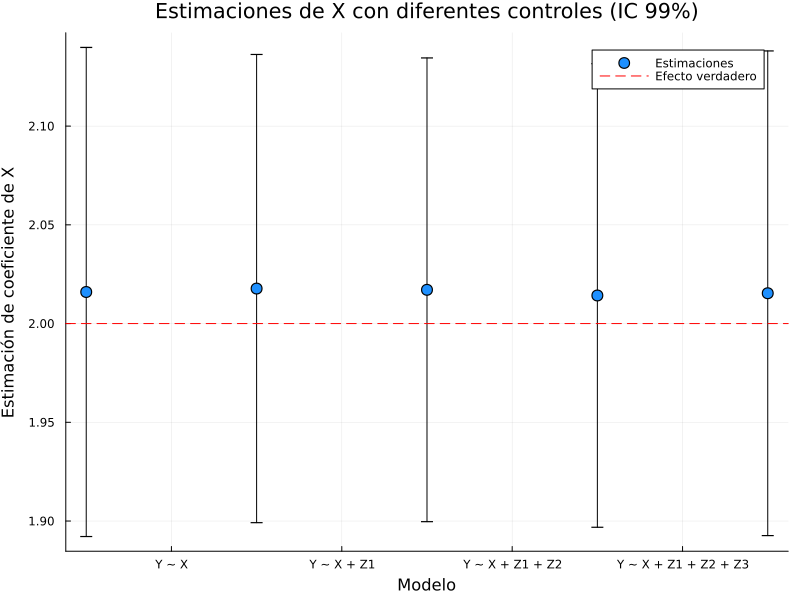

In [39]:
using DataFrames, GLM, Distributions, Plots, StatsModels

# --- Datos de ejemplo ---
n = 1000
datos = DataFrame(
    X = randn(n),
    Z1 = randn(n),
    Z2 = randn(n),
    Z3 = randn(n)
)
datos.Y = 1 .+ 2 .* datos.X .+ 0.5 .* datos.Z1 .+ 0.2 .* datos.Z2 .+ 0.1 .* datos.Z3 .+ randn(n)

# --- Definimos las fórmulas ---
regresiones = Dict(
    "Y ~ X" => @formula(Y ~ 0 + X),
    "Y ~ X + Z1" => @formula(Y ~ 0 + X + Z1),
    "Y ~ X + Z2" => @formula(Y ~ 0 + X + Z2),
    "Y ~ X + Z1 + Z2" => @formula(Y ~ 0 + X + Z1 + Z2),
    "Y ~ X + Z1 + Z2 + Z3" => @formula(Y ~ 0 + X + Z1 + Z2 + Z3)
)

# --- Ajustamos los modelos ---
resultados = Dict{String, Any}()
for (nombre, formula) in regresiones
    resultados[nombre] = lm(formula, datos)
end

# --- Nivel de confianza ---
α = 0.01
z = quantile(Normal(0,1), 1 - α/2)

# --- Construimos tabla para el gráfico ---
df_plot = DataFrame(Modelo = String[], Coef_X = Float64[], CI_low = Float64[], CI_high = Float64[])

for (nombre, modelo) in resultados
    # Buscar cualquier coeficiente que contenga "X" en su nombre
    nombres_coef = coefnames(modelo)
    idx_x = findfirst(x -> occursin("X", String(x)), nombres_coef)
    
    if idx_x !== nothing
        β = coef(modelo)[idx_x]
        se = stderror(modelo)[idx_x]
        push!(df_plot, (nombre, β, β - z*se, β + z*se))
    else
        println("⚠️  El modelo '$nombre' no tiene coeficiente que contenga 'X'. Se omite.")
    end
end

# Ordenar y mostrar
df_plot = sort(df_plot, :Modelo)
display(df_plot)

# --- Gráfico ---
plot(
    df_plot.Modelo,
    df_plot.Coef_X;
    yerror = (df_plot.Coef_X .- df_plot.CI_low, df_plot.CI_high .- df_plot.Coef_X),
    seriestype = :scatter,
    markershape = :circle,
    markersize = 6,
    color = :dodgerblue,
    label = "Estimaciones",
    legend = :topright,
    xlabel = "Modelo",
    ylabel = "Estimación de coeficiente de X",
    title = "Estimaciones de X con diferentes controles (IC 99%)",
    size = (800, 600),
)

hline!([2], color=:red, linestyle=:dash, label="Efecto verdadero")
xticks!(1:length(df_plot.Modelo), df_plot.Modelo)
plot!(xtickfont = 8)  # sin font()
